In [60]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from urllib.parse import urlparse
!pip install tld
from tld import get_tld
import re
#from google.colab import drive
#from google.colab import files
import socket

In [61]:
#uploaded = files.upload()

In [62]:
#drive.mount('/content/drive')


In [63]:
df=pd.read_csv("malicious_phish.csv")

In [64]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [65]:
df.columns

Index(['url', 'type'], dtype='object')

In [66]:
df.shape

(651191, 2)

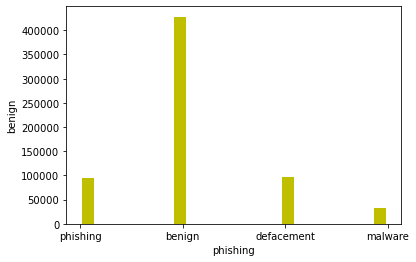

In [67]:
plt.hist(df.type,bins=20,rwidth=0.8,color='y')
plt.xlabel('phishing')
plt.ylabel('benign')
plt.show()

In [68]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [70]:
df['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [71]:
df.isnull().sum()

url     0
type    0
dtype: int64

# labellings datasets

In [72]:
#labelling the type 

In [73]:
labelEncoder= LabelEncoder()
df['label']=labelEncoder.fit_transform(df['type'])

In [74]:
df.head(5)

,url,type,label
0,br-icloud.com.br,phishing,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


# Length checking

In [75]:
#url length 
df['url_len']=df['url'].apply(lambda url: len(str(url)))

In [76]:
df.head(5)

,url,type,label,url_len
0,br-icloud.com.br,phishing,3,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


In [77]:
#host url length 
df['host_url_len']=df['url'].apply(lambda url:len(urlparse(url).netloc))

In [78]:
df.head(5)

,url,type,label,url_len,host_url_len
0,br-icloud.com.br,phishing,3,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23


In [79]:
#url path length
df['path_len'] = df['url'].apply(lambda url: len(urlparse(url).path))

In [80]:
df.head()

,url,type,label,url_len,host_url_len,path_len
0,br-icloud.com.br,phishing,3,16,0,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10


In [81]:
#extract TLD
def custom_get_tld(url:str):
  tld =get_tld(url,fail_silently=True)
  return tld if tld else ''

df['tld']=df['url'].apply(lambda url: custom_get_tld(str(url)))


In [82]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld
0,br-icloud.com.br,phishing,3,16,0,16,
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,net


In [83]:
#lable encoding of tld 
tldEncoder = LabelEncoder()
df['tld_vec'] = tldEncoder.fit_transform(df['tld'])

In [84]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld,tld_vec
0,br-icloud.com.br,phishing,3,16,0,16,,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,be,35
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,net,353


In [85]:
#df['tld_len'] =df['tld'].apply(lambda tld: len(tld))
 
#drop tld
df.drop(["tld"],axis = 1, inplace = True)

In [86]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld_vec
0,br-icloud.com.br,phishing,3,16,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353


In [87]:


#tld path len
#df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
#def tld_len(tld):
#    try:
#        return len(tld)
#    except:
#        return -1

#df['tld_len'] = df['tld'].apply(lambda i: tld_len(i))

In [88]:
df.head(5)

,url,type,label,url_len,host_url_len,path_len,tld_vec
0,br-icloud.com.br,phishing,3,16,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353


# 2ndry  features


In [89]:
#count www in the url
df['www_count'] = df['url'].apply(lambda url: url.count('www'))

In [90]:
#count https in url
df['https_count'] = df['url'].apply(lambda url: url.count('https'))

In [91]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld_vec,www_count,https_count
0,br-icloud.com.br,phishing,3,16,0,16,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353,0,0


In [92]:
#count special charecter
def countSpchar(url: str,charset:str):
    s=0
    for i in url:
        if i in charset: s = s+1
    return s
df['sp_char_count'] = df['url'].apply(lambda url:countSpchar(url,'!#$%&()*+,-./:;<=>?@[\]^_`{|}~'))

In [93]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld_vec,www_count,https_count,sp_char_count
0,br-icloud.com.br,phishing,3,16,0,16,0,0,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0,0,0,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0,0,0,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35,1,0,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353,0,0,14


In [94]:
#count Path directories
def d_length(url):
    urlpath= urlparse(url).path
    try: 
        return len(urlpath.split('/')[1])
    except: 
        return 0;
    
df['d_length'] = df['url'].apply(lambda url: d_length(url))

In [95]:
df.head(5)

,url,type,label,url_len,host_url_len,path_len,tld_vec,www_count,https_count,sp_char_count,d_length
0,br-icloud.com.br,phishing,3,16,0,16,0,0,0,3,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0,0,0,5,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0,0,0,5,7
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35,1,0,18,9
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353,0,0,14,9


In [96]:
#count digits in the url
def count_digits(url: str):
    s=0
    for i in url:
        if i.isnumeric(): s +=1
    return s
df['digit_count'] = df['url'].apply(lambda url: count_digits(url))

In [97]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld_vec,www_count,https_count,sp_char_count,d_length,digit_count
0,br-icloud.com.br,phishing,3,16,0,16,0,0,0,3,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0,0,0,5,5,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0,0,0,5,7,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35,1,0,18,9,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353,0,0,14,9,22


In [98]:
#counts letters in url
def count_letters(url: str):
    s=0
    for i in url:
        if i.isalpha(): s +=1
    return s
df['letters_count'] = df['url'].apply(lambda url: count_letters(url))

In [99]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld_vec,www_count,https_count,sp_char_count,d_length,digit_count,letters_count
0,br-icloud.com.br,phishing,3,16,0,16,0,0,0,3,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0,0,0,5,5,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0,0,0,5,7,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35,1,0,18,9,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353,0,0,14,9,22,199


# Binary features


In [100]:
#url domain ip address check 
#def isIP(url:str):
  #  match=re.match('  ')

In [101]:
#import socket
#def good_netloc(url):
#    try:
#        socket.gethostbyname(url)
#       return True
#    except:
#        return False
#df['host_check'] = df['url'].apply(lambda url: good_netloc(url))
# print good_netloc("google.com")
# print good_netloc("googlecom")
# print good_netloc("10.1.1.1")
# print good_netloc("999.999.999.999")

## importing socket module
## getting the hostname by socket.gethostname() method
#hostname = socket.gethostname()
## getting the IP address using socket.gethostbyname() method
#ip_address = socket.gethostbyname(hostname)
## printing the hostname and ip_address
#print(f"Hostname: {hostname}")S
#print(f"IP Address: {ip_address}")

In [102]:
from urllib.parse import urlparse
domain = urlparse('https://supermavster.com').netloc

In [103]:
domain

'supermavster.com'

In [104]:
def isIP(url: str):
  match = re.match("^((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])\.){3}(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])$",url)
  return 1 if match else 0
  
df['is_ip']=df['url'].apply(lambda url: isIP(str(urlparse(url).hostname)))


In [105]:
df.head()

,url,type,label,url_len,host_url_len,path_len,tld_vec,www_count,https_count,sp_char_count,d_length,digit_count,letters_count,is_ip
0,br-icloud.com.br,phishing,3,16,0,16,0,0,0,3,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,0,0,0,5,5,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,0,0,0,5,7,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,10,35,1,0,18,9,7,63,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,353,0,0,14,9,22,199,0


DATA VISUALIZATION

In [106]:
#url type 

Text(0.5, 1.0, 'Types of url prrsent in the data set')

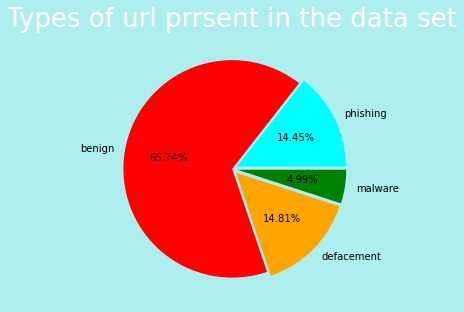

In [107]:
types= df['type'].unique()
num_types = [len(df[df['type']==type]) for type in types]

color_list= ["cyan","red","orange","green"]
plt.figure(figsize=(5,5), facecolor="PaleTurquoise")
plt.pie(num_types, labels=types, colors= color_list, autopct='%0.2f%%',explode=(0.05,0,0.05,0.05))
plt.title('Types of url prrsent in the data set', fontdict={'color':"white",'size':26})

<function matplotlib.pyplot.show(close=None, block=None)>

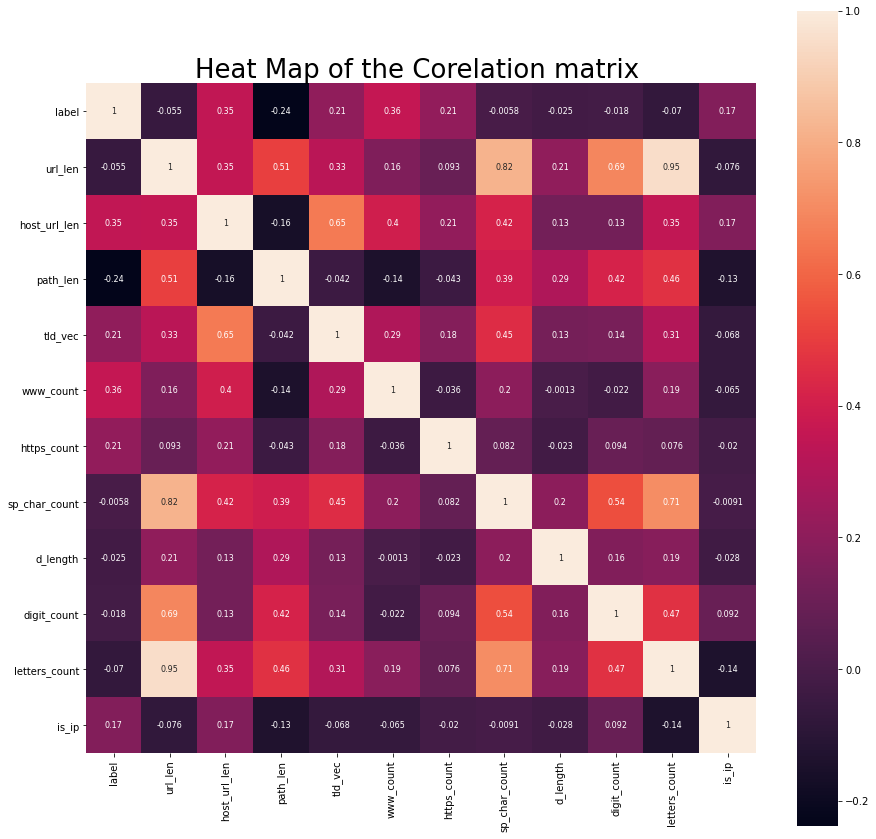

In [108]:
#Heat map 
corr_matrix =df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,square=True, annot=True, annot_kws={'size':8})
plt.title('Heat Map of the Corelation matrix ', fontdict={'color':"Black",'size':26})
plt.show

In [109]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df.iloc[:,3:], df['label'])
mutual_info 

array([0.10814146, 0.39429179, 0.2263089 , 0.36836188, 0.18006722,
       0.03110277, 0.18507965, 0.17615757, 0.0829573 , 0.11042274,
       0.05702067])

In [110]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.iloc[:,3:].columns
mutual_info = mutual_info.sort_values(ascending =True)

In [111]:
mutual_info

https_count      0.031103
is_ip            0.057021
digit_count      0.082957
url_len          0.108141
letters_count    0.110423
d_length         0.176158
www_count        0.180067
sp_char_count    0.185080
path_len         0.226309
tld_vec          0.368362
host_url_len     0.394292
dtype: float64

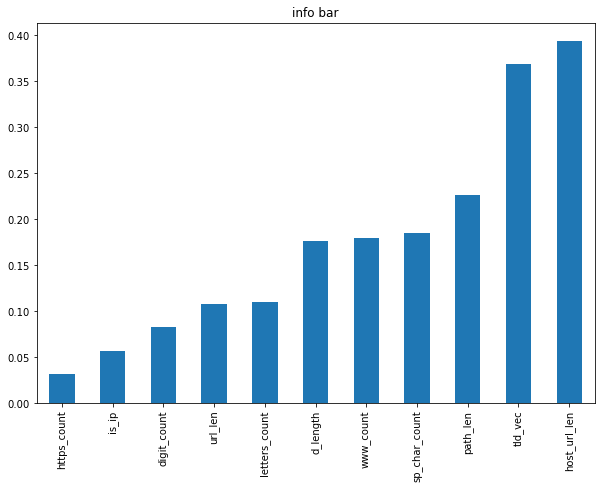

In [112]:
plt.figure(figsize=(10,7))
mutual_info.plot.bar()
plt.title("info bar")

plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,mean_squared_error,precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [114]:
x=df.iloc[:,3:]
y=df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)


In [115]:
ss= StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

mm = MinMaxScaler()
x_train_mn = mm.fit_transform(x_train)
x_test_mn = mm.transform(x_test)

In [116]:
lr = LogisticRegression(max_iter =900)
lr.fit(x_train_mn,y_train)
y_pred = lr.predict(x_test_mn)
lr_accuracy_score = accuracy_score(y_test,y_pred)

In [117]:
print(lr_accuracy_score)

0.8566017260618967


In [123]:
#rf= RandomForestClassifier(n_estimators = 900)
#rf.fit(x_train_mn,y_train)
#y_pred = rf.predict(x_test_mn)
#rf_accuracy_score = accuracy_score(y_test,y_pred)

In [ ]:
#results = [] # init 
r = range(100, 1000)
for i in r:
    rf_model_i = RandomForestClassifier(criterion = "gini",n_estimators = i, oob_score= True)
    rf_model_i.id = [i]
    rf_model_i.fit(x_train_mn,y_train)
    y_predict_i = rf_model_i.predict(x_test_mn)
    accuracy_i = [accuracy_score(y_test, y_predict_i), i]
    results.append(accuracy_i)